<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/autokeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.datasets import mnist
import autokeras as ak

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

clf.fit(x_train, y_train, epochs=1)

Trial 1 Complete [00h 02m 22s]
val_loss: 0.07845312356948853

Best val_loss So Far: 0.07845312356948853
Total elapsed time: 00h 02m 22s
1875/1875 [==============================] - 158s 84ms/step - loss: 0.1583 - accuracy: 0.9519


In [5]:
model = clf.export_model()

try:
    model.save("model_autokeras", save_format="tf")
except Exception:
    model.save("model_autokeras.h5")


print('Model saved')

Model saved


1/1 [==============================] - 0s 127ms/step


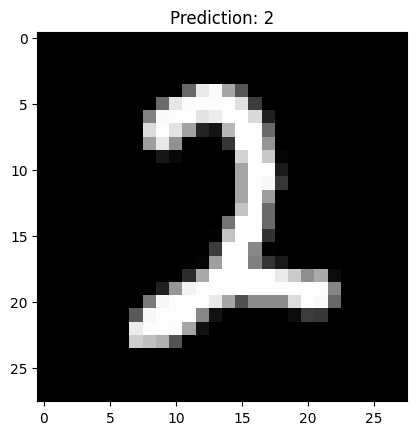

In [6]:
model = load_model('model_autokeras')

random_index = np.random.randint(0, len(x_test))
image = x_test[random_index]

prediction = model.predict(image)
plt.title(f'Prediction: {np.argmax(prediction)}')
plt.imshow(image, cmap='gray')
plt.show()